In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Get Twitter API credentials
from config import *

In [3]:
# Create the authentication object
auth = tweepy.OAuthHandler(API_KEY, API_SECRET_KEY)

# Set the access token and access token secret
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# Create the API object while passing in the auth information
api = tweepy.API(auth, wait_on_rate_limit = True)

In [4]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count=100, lang="en", tweet_mode="extended")

# Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
for i, tweet in enumerate(posts[0:5]):
  print('{}: {}\n'.format(i, tweet.full_text))

Show the 5 recent tweets: 

0: Europe has an opportunity to get its economy back on track in a way that creates good jobs and reinforces its global climate leadership. Here are 55 ideas on how Europe can develop and scale up the innovative technologies we'll need to reach net-zero. https://t.co/uhcKCvjYeX

1: The COVID-19 pandemic has set back efforts to end poverty, hunger, and malnutrition. Investing in @CGIAR will speed the recovery by helping farmers adapt to climate change and rebuild food systems after the pandemic (via @Nature). https://t.co/8zR2SVORiC

2: .@StephenCurry30’s work in the community is as inspiring as his amazing record on the basketball court. I really appreciated the thoughtful conversation. https://t.co/dpDh3WHR3W

3: Dr. Tunji Funsho’s work with @Rotary was essential in stopping wild polio in Africa and will help create a polio-free world for all. A well-deserved recognition. https://t.co/CT1muyPyS3

4: This honor is well deserved. COVID-19 is not just a health

In [5]:
# Create a dataframe with a column
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])

# Show the first 5 rows of data
df.head()

,Tweets
0,Europe has an opportunity to get its economy b...
1,The COVID-19 pandemic has set back efforts to ...
2,.@StephenCurry30’s work in the community is as...
3,Dr. Tunji Funsho’s work with @Rotary was essen...
4,This honor is well deserved. COVID-19 is not j...


In [19]:
# Clean the text

# Create a function to clean the tweets
def clean_text(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removes @mentions
            #   ^ r tells python this is a raw string
  text = re.sub(r'#', '', text) # Removes hashtags
  text = re.sub(r'RT[\s]+', '', text) # Removing RT
            #   ^ RT is retweets in Twitter, and remove these tweets 
            #     followed by one or more whitespaces
  text = re.sub(r'https?:\/\/\s+', '', text) # Remove the hyper link

  return text

df['Tweets'] = df['Tweets'].apply(clean_text)

# Show the cleaned text
df.head()

,Tweets,Subjectivity,Polarity
0,Europe has an opportunity to get its economy b...,0.400,0.300
1,The COVID-19 pandemic has set back efforts to ...,0.000,0.000
2,.’s work in the community is as inspiring as h...,0.625,0.425
3,Dr. Tunji Funsho’s work with was essential in...,0.350,0.050
4,This honor is well deserved. COVID-19 is not j...,0.000,0.000


In [20]:
# Create a function to get the subjectivity
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

df

,Tweets,Subjectivity,Polarity
0,Europe has an opportunity to get its economy b...,0.400000,0.3000
1,The COVID-19 pandemic has set back efforts to ...,0.000000,0.0000
2,.’s work in the community is as inspiring as h...,0.625000,0.4250
3,Dr. Tunji Funsho’s work with was essential in...,0.350000,0.0500
4,This honor is well deserved. COVID-19 is not j...,0.000000,0.0000
...,...,...,...
95,We don't yet have all the tools we need to sto...,0.500000,0.5000
96,This is a great introduction to computer scien...,0.750000,0.8000
97,Halting funding for the World Health Organizat...,0.591667,-0.0125
98,. does an amazing job capturing the heroism of...,0.900000,0.6000


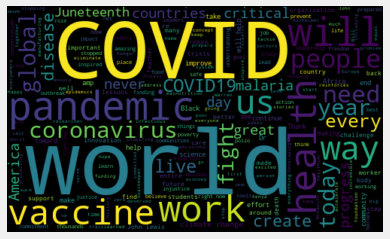

In [21]:
# Plot the Word cloud
all_words = ' '.join([tweets for tweets in df['Tweets']])
word_cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
# Create a function to compute the negative, neutral, and positive analysis
def get_analysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(get_analysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Europe has an opportunity to get its economy b...,0.400000,0.3000,Positive
1,The COVID-19 pandemic has set back efforts to ...,0.000000,0.0000,Neutral
2,.’s work in the community is as inspiring as h...,0.625000,0.4250,Positive
3,Dr. Tunji Funsho’s work with was essential in...,0.350000,0.0500,Positive
4,This honor is well deserved. COVID-19 is not j...,0.000000,0.0000,Neutral
...,...,...,...,...
95,We don't yet have all the tools we need to sto...,0.500000,0.5000,Positive
96,This is a great introduction to computer scien...,0.750000,0.8000,Positive
97,Halting funding for the World Health Organizat...,0.591667,-0.0125,Negative
98,. does an amazing job capturing the heroism of...,0.900000,0.6000,Positive


In [27]:
# Print all of the positive tweets
sorted_df = df.sort_values(by=['Polarity'])
for i in range(0, sorted_df.shape[0]): # <--- number of rows in dataframe
  if sorted_df['Analysis'][i] == 'Positive':
    print('{}: {}\n'.format(i, sorted_df['Tweets'][i]))

0: Europe has an opportunity to get its economy back on track in a way that creates good jobs and reinforces its global climate leadership. Here are 55 ideas on how Europe can develop and scale up the innovative technologies we'll need to reach net-zero. 

2: .’s work in the community is as inspiring as his amazing record on the basketball court. I really appreciated the thoughtful conversation. 

3: Dr. Tunji Funsho’s work with  was essential in stopping wild polio in Africa and will help create a polio-free world for all. A well-deserved recognition. 

6: I’m excited to see this kind of innovation. Detecting and predicting outbreaks earlier is critical to preventing epidemics. 

7: The only way to eliminate the threat of COVID-19 somewhere is to eliminate it everywhere. By making sure poor countries are equipped to stop this disease, wealthy countries will help themselves and bring this crisis to an end sooner. 

8: Understanding this concept can help us measure our progress toward e

In [28]:
# Print all of the negative tweets
sorted_df = df.sort_values(by=['Polarity'])
for i in range(0, sorted_df.shape[0]): # <--- number of rows in dataframe
  if sorted_df['Analysis'][i] == 'Negative':
    print('{}: {}\n'.format(i, sorted_df['Tweets'][i]))

11: : What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…

13: To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to decarbonize sectors—to get us on a viable path to net-zero emissions. 

37: Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these young people and for the country. Here’s what we’re doing to help: 

58: : Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries:
🔸 Screening…

63: Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-overlooked challenge. 

66: : “It’s that clarity of language about the VALUE of black life in America that distinguishes J

In [29]:
# Print all of the negative tweets
sorted_df = df.sort_values(by=['Polarity'])
for i in range(0, sorted_df.shape[0]): # <--- number of rows in dataframe
  if sorted_df['Analysis'][i] == 'Neutral':
    print('{}: {}\n'.format(i, sorted_df['Tweets'][i]))

1: The COVID-19 pandemic has set back efforts to end poverty, hunger, and malnutrition. Investing in  will speed the recovery by helping farmers adapt to climate change and rebuild food systems after the pandemic (via ). 

4: This honor is well deserved. COVID-19 is not just a health crisis—it is also now a food crisis, and  is there to respond. I’m inspired by the thousands of people in the organization who have committed their lives to fighting hunger. 

5: For the last 25 years, Dr. Firdausi Qadri, an immunologist and infectious disease researcher in Bangladesh, has been working to protect entire communities from cholera epidemics. 

31: : Vaccines prevent millions of deaths every year by harnessing the body’s immune system to create defences against future infection…

33: : As a community health worker in Kenya’s Homa Bay County, Evaline has helped her community dramatically reduce the number of…

35: Move aside, . This is the still the world’s deadliest killer:  

38: : This commi

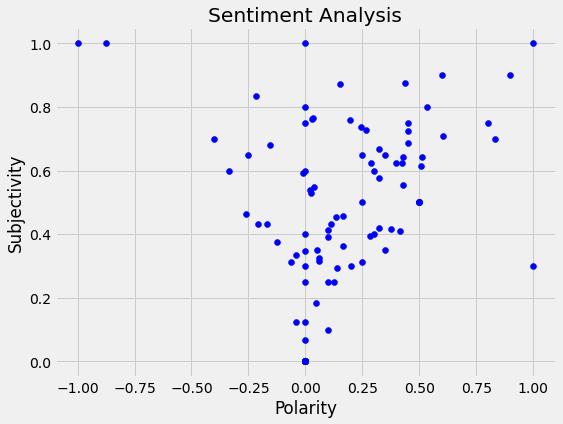

In [30]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.show()

In [32]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0])*100, 1)

61.0

In [34]:
# Get the percentage of negative tweets
negtweets = df[df.Analysis == 'Negative']
negtweets = negtweets['Tweets']

round((negtweets.shape[0] / df.shape[0])*100, 1)

15.0

In [35]:
# Get the percentage of neutral tweets
neutraltweets = df[df.Analysis == 'Neutral']
neutraltweets = neutraltweets['Tweets']

round((neutraltweets.shape[0] / df.shape[0])*100, 1)

24.0

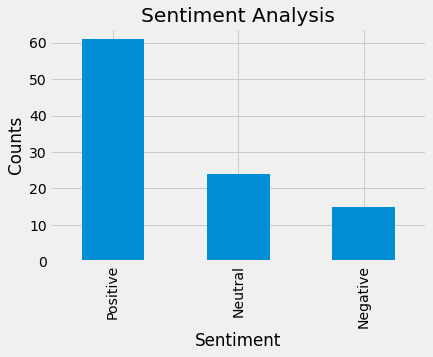

In [36]:
# Show the value counts

df['Analysis'].value_counts()

# Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()